# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

`downtownsandiego.org-homeless_count-gaslamp-1` Last Update: 2019-06-11T22:54:44

__




 
 
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)
 
## Resources

* ** [gaslamp](data/gaslamp.csv)**.

In [3]:
resource_name='gaslamp'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
id,integer,
date,date,
neighborhood,string,Neighborhood name; always 'gaslamp'
map_id,integer,Map number
type,string,"Type of group: 'ind' for individuals, or 'encampment'"
count,integer,Number of homeless people in the count point
rain,string,"Does the map record rain? 'yes', 'no' or blank if no record"
temperature,string,"Temperature in F, if recorded on the map"
lon,number,Longitude of count point
lat,number,Latitude of count point


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,id,date,neighborhood,map_id,type,count,rain,temperature,lon,lat
0,1,2014-01-01,gaslamp,1,ind,1,NaN,NaN,-117.160995,32.715539
1,2,2014-01-01,gaslamp,1,ind,1,NaN,NaN,-117.160232,32.715144
2,3,2014-01-01,gaslamp,1,ind,1,NaN,NaN,-117.159330,32.715615
3,611,2014-01-01,gaslamp,1,ind,1,NaN,NaN,-117.160226,32.713199
4,645,2014-01-01,gaslamp,1,ind,1,NaN,NaN,-117.160946,32.712464


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,1
number,6
other,3


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 1 columns):
date    987 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


None

,count,unique,top,freq,first,last
date,987,59,2018-03-28 00:00:00,36,2014-01-01 00:00:00,2018-06-28 00:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 6 columns):
id             987 non-null int64
map_id         987 non-null int64
count          987 non-null int64
temperature    447 non-null float64
lon            987 non-null float64
lat            987 non-null float64
dtypes: float64(3), int64(3)
memory usage: 46.3 KB


None

,count,mean,std,min,25%,50%,75%,max
id,987.0,524.025329,301.672079,1.000000,265.500000,523.000000,784.500000,1071.00000
map_id,987.0,31.007092,15.530019,1.000000,19.000000,33.000000,44.000000,54.00000
count,987.0,2.009119,1.734660,1.000000,1.000000,1.000000,2.000000,18.00000
temperature,447.0,57.939597,6.413510,42.000000,52.000000,59.000000,63.000000,67.00000
lon,987.0,-117.160093,0.000560,-117.161310,-117.160545,-117.160049,-117.159610,-117.15925
lat,987.0,32.711604,0.002563,32.706784,32.709683,32.711949,32.713522,32.71566


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


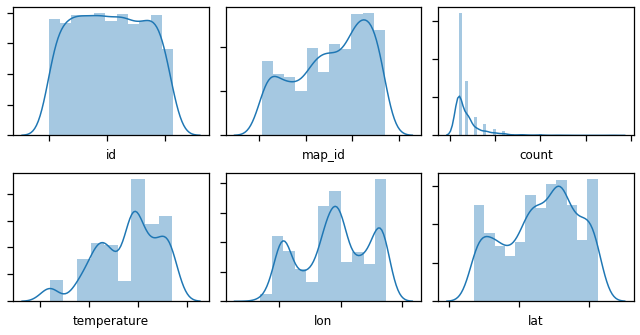

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

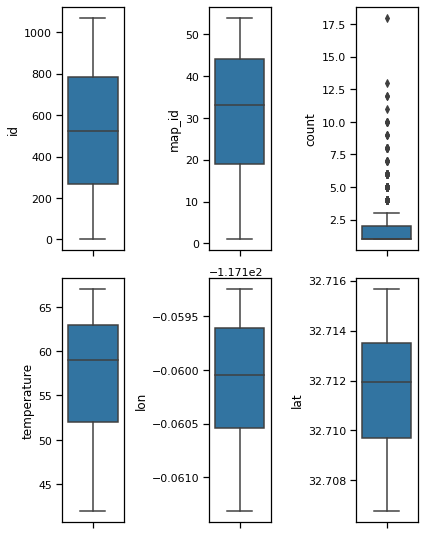

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

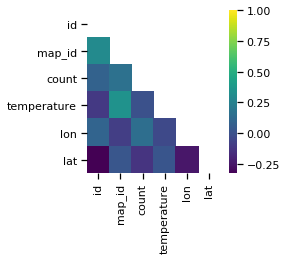

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
neighborhood    987 non-null object
type            987 non-null object
rain            497 non-null object
dtypes: object(3)
memory usage: 23.2+ KB


None

,count,unique,top,freq
neighborhood,987,4,gaslamp,929
type,987,2,ind,980
rain,497,2,no,444


# Nulls


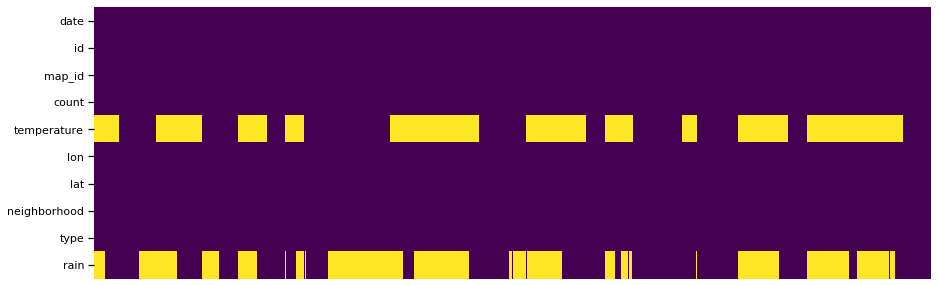

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )

# Other

In [21]:
df.date.describe()

count                     987
unique                     59
top       2018-03-28 00:00:00
freq                       36
first     2014-01-01 00:00:00
last      2018-06-28 00:00:00
Name: date, dtype: object